# 물체 탐지(Object detection)

# 실습 준비

## Google Driver와 Colab 연동

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### 폴더 경로 링크 생성
- /content/gdrive/My Drive/04_영상인식_copied/CH678와 동일한 경로를 갖는 링크(/content/CH678)를 생성
- /content/gdrive의 하위 폴더인 My Drive의 공백으로 인한 Error 방지

In [0]:
!if [ ! -L /content/CH678 ]; then \
  ln -s "/content/gdrive/My Drive/04_영상인식_copied/CH678" /content/CH678 ; \
 fi

## 실행위치 이동

In [3]:
# 현재 위치
!pwd

# 실행 위치 이동
%cd "/content/CH678"

# 이동된 위치 확인
!pwd
!ls -al


/content
/content/gdrive/My Drive/04_영상인식_copied/CH678
/content/gdrive/My Drive/04_영상인식_copied/CH678
total 7129
drwx------ 2 root root    4096 Feb  8 09:04 data
drwx------ 2 root root    4096 Feb  8 09:04 .ipynb_checkpoints
drwx------ 2 root root    4096 Feb  8 09:04 keras-yolo3
-rw------- 1 root root 7287502 Feb 11 00:13 Keras_Yolov3_190208_v2.ipynb


## 1. YOLO3 소스코드


*   원본 주소 : https://github.com/qqwweee/keras-yolo3.git

In [0]:
%cd /content/CH678
%ls

/content/gdrive/My Drive/04_영상인식_copied/CH678
data/         Keras_Yolov3_190207_v2.ipynb  Keras_Yolov3_190208_v3.ipynb
keras-yolo3/  Keras_Yolov3_190208_v2.ipynb


## 2. Convert Keras Model - Yolov3


- convert.py로 Yolo 모델을 Keras 모델로 변환(모델정보 출력)

 - yolov3.cfg : Darknet yolov3 모델의 Layer

 - yolov3.weight : Darknet yolov3 모델의 weight
 
 - yolo.h5 : Darknet yolov3 모델을 keras 모델로 변환한 대용량 파일








In [21]:
#@title Output { vertical-output: true }
%cd /content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/
%run convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

[Errno 2] No such file or directory: 'content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/'
/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3


Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.


Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsi

### (1) 모델 input, output, filter의 shape 연결구조

In [0]:
#@title Output { vertical-output: true }
%cd model_data
from keras.models import load_model
from keras.utils.vis_utils import plot_model as plot
from IPython.display import Image, display

model = load_model('yolo.h5')

for i in model.layers:
  a = i.get_weights()
  
  if len(a) == 1 :
      aa = a[0].shape
  else :
        aa = ''
 
  print('layer_name : ', i.name) 
  print('\t\t\tinput_shape  : ' , i.input_shape)
  print('\t\t\tfilter_shape : ' , aa )
  print('\t\t\toutput_shape : ', i.output_shape)

/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/model_data


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


layer_name :  input_1
			input_shape  :  (None, None, None, 3)
			filter_shape :  
			output_shape :  (None, None, None, 3)
layer_name :  conv2d_1
			input_shape  :  (None, None, None, 3)
			filter_shape :  (3, 3, 3, 32)
			output_shape :  (None, None, None, 32)
layer_name :  batch_normalization_1
			input_shape  :  (None, None, None, 32)
			filter_shape :  
			output_shape :  (None, None, None, 32)
layer_name :  leaky_re_lu_1
			input_shape  :  (None, None, None, 32)
			filter_shape :  
			output_shape :  (None, None, None, 32)
layer_name :  zero_padding2d_1
			input_shape  :  (None, None, None, 32)
			filter_shape :  
			output_shape :  (None, None, None, 32)
layer_name :  conv2d_2
			input_shape  :  (None, None, None, 32)
			filter_shape :  (3, 3, 32, 64)
			output_shape :  (None, None, None, 64)
layer_name :  batch_normalization_2
			input_shape  :  (None, None, None, 64)
			filter_shape :  
			output_shape :  (None, None, None, 64)
layer_name :  leaky_re_lu_2
			input_shape  :  (N

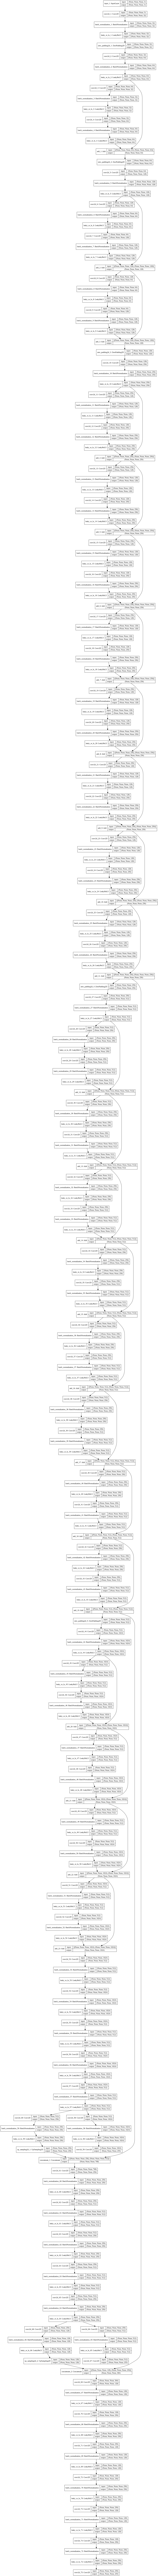

In [0]:
# 모델 구조 이미지화
plot(model, show_shapes=True, to_file='Yolov3.png')
display(Image(filename='Yolov3.png')) 

## 3. Download example data
 - Object Detection할 예제 데이터
 - 원본주소 : http://health.chosun.com/site/data/img_dir/2018/01/17/2018011700908_0.jpg
 - ex_img.jpg 파일

In [0]:
#@title Output { vertical-output: true }
%cd  /content/CH678/data
%ls

/content/gdrive/My Drive/04_영상인식_copied/CH678/data
ex_img.jpg  VOCtest_06-Nov-2007.tar  VOCtrainval_06-Nov-2007.tar


## 4. Install library
- 속성(attributes)으로 명령어 값을 작동하게 하는 라이브러리 설치

In [0]:
#@title Output { vertical-output: true }
!pip install easydict

## 5. Object Detection 예제
- Output 셸에 다운로드한 이미지 파일을 입력
 - yolo.h5 : coco dataset으로 Pretrain한 모델
 - anchors : yolov3의 9개의 anchors Box (Pretrained)
 - classes : coco dataset의 80개의 classes

- 샘플 이미지 파일의 경로 입력 /content/CH678/data/ex_img.jpg
- end 입력시 종료

/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
Image detection mode
model_data/yolo.h5 model, anchors, and classes loaded.
Input image filename:/content/CH678/data/ex_img.jpg
(416, 416, 3)
Found 12 boxes for img
dog 0.36 (309, 209) (402, 285)
dog 0.57 (279, 151) (347, 268)
dog 0.88 (2, 133) (68, 284)
dog 0.90 (505, 62) (593, 290)
dog 0.95 (400, 194) (507, 287)
dog 0.96 (146, 133) (243, 286)
dog 0.96 (406, 70) (511, 289)
dog 0.97 (329, 100) (423, 226)
dog 0.99 (45, 95) (190, 276)
cat 0.41 (309, 209) (402, 285)
cat 0.48 (504, 40) (592, 298)
cat 0.55 (279, 151) (347, 268)
6.132811807001417


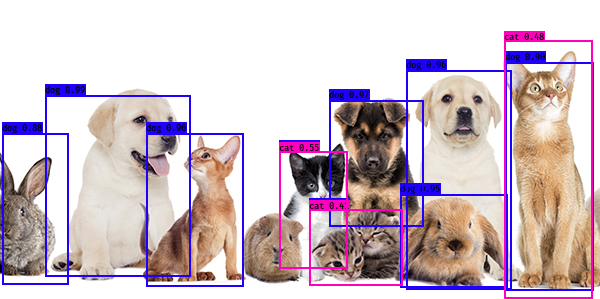

Input image filename:end


In [0]:
#@title Output { vertical-output: true }
%cd "/content/CH678/keras-yolo3"
import sys
import argparse
import easydict

from IPython.display import display # to display images

sys.path.append('/content/CH678/keras-yolo3')

from yolo import YOLO, detect_video
from PIL import Image


def detect_img(yolo):
    while True:
        img = input('Input image filename:')
        
        if img =='end':
            break
            
        else:
            try:
                image = Image.open(img)
            except:
                print('Open Error! Try again!')
                continue
            else:
                r_image = yolo.detect_image(image)
                #r_image.show()
                display(r_image)
    
       # yolo.close_session()

FLAGS = None

args=easydict.EasyDict( {
            'model':    YOLO.get_defaults("model_path")
           ,'anchors': YOLO.get_defaults("anchors_path")
           ,'classes': YOLO.get_defaults("classes_path")
#           ,'gpu_num': str(YOLO.get_defaults("gpu_num"))
           ,'image' : 'a'
        })

if __name__ == '__main__':

    FLAGS = args
    print("Image detection mode")
    detect_img(YOLO(**vars(FLAGS)))

## 6. Download Train Dataset
- Pascal Visual Object Classes dataset
 - 객체 클래스 인식을 위한 표준화된 이미지 셋과 주석(Annotation) 제공
 - 2008년 이후로는 Annotation이 제공되지 않으므로 2007년 Dataset을 사용한다.
 - 원본 : https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
 - 원본 : https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
 - 압축을 풀면 VOCdevkit 이라는 dataset 폴더가 생성된다.

In [2]:
#@title Output { vertical-output: False }
%cd /content/gdrive/My Drive/04_영상인식_copied/CH678/data

/content/gdrive/My Drive/04_영상인식_copied/CH678/data


In [3]:
!tar xf VOCtrainval_06-Nov-2007.tar -C /tmp/
!tar xf VOCtest_06-Nov-2007.tar -C /tmp/

VOCdevkit/
VOCdevkit/VOC2007/
VOCdevkit/VOC2007/Annotations/
VOCdevkit/VOC2007/Annotations/000005.xml
VOCdevkit/VOC2007/Annotations/000007.xml
VOCdevkit/VOC2007/Annotations/000009.xml
VOCdevkit/VOC2007/Annotations/000012.xml
VOCdevkit/VOC2007/Annotations/000016.xml
VOCdevkit/VOC2007/Annotations/000017.xml
VOCdevkit/VOC2007/Annotations/000019.xml
VOCdevkit/VOC2007/Annotations/000020.xml
VOCdevkit/VOC2007/Annotations/000021.xml
VOCdevkit/VOC2007/Annotations/000023.xml
VOCdevkit/VOC2007/Annotations/000024.xml
VOCdevkit/VOC2007/Annotations/000026.xml
VOCdevkit/VOC2007/Annotations/000030.xml
VOCdevkit/VOC2007/Annotations/000032.xml
VOCdevkit/VOC2007/Annotations/000033.xml
VOCdevkit/VOC2007/Annotations/000034.xml
VOCdevkit/VOC2007/Annotations/000035.xml
VOCdevkit/VOC2007/Annotations/000036.xml
VOCdevkit/VOC2007/Annotations/000039.xml
VOCdevkit/VOC2007/Annotations/000041.xml
VOCdevkit/VOC2007/Annotations/000042.xml
VOCdevkit/VOC2007/Annotations/000044.xml
VOCdevkit/VOC2007/Annotations/000046.

## 7. Make Annotation .txt file
- voc_annotation.py로 image파일 경로 + Bounding Box 정보 + Class Index 정보가 있는 txt 파일 생성

In [5]:
#@title Output { vertical-output: true }
%cd /tmp
%run '/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/voc_annotation.py'

/tmp


### (1) modify train.txt
- 경로 수정 필요
- 원활한 학습을 위해 train할 데이터로 2007_train.txt만 사용 

In [12]:
#@title Output { vertical-output: true }
%ls

2007_test.txt   2007_val.txt    drivefs_ipc.0_shell=
2007_train.txt  drivefs_ipc.0=  VOCdevkit/


In [7]:
#@title Output { vertical-output: true }
!head 2007_train.txt

/tmp/VOCdevkit/VOC2007/JPEGImages/000012.jpg 156,97,351,270,6
/tmp/VOCdevkit/VOC2007/JPEGImages/000017.jpg 185,62,279,199,14 90,78,403,336,12
/tmp/VOCdevkit/VOC2007/JPEGImages/000023.jpg 9,230,245,500,1 230,220,334,500,1 2,1,117,369,14 3,2,243,462,14 225,1,334,486,14
/tmp/VOCdevkit/VOC2007/JPEGImages/000026.jpg 90,125,337,212,6
/tmp/VOCdevkit/VOC2007/JPEGImages/000032.jpg 104,78,375,183,0 133,88,197,123,0 195,180,213,229,14 26,189,44,238,14
/tmp/VOCdevkit/VOC2007/JPEGImages/000033.jpg 9,107,499,263,0 421,200,482,226,0 325,188,411,223,0
/tmp/VOCdevkit/VOC2007/JPEGImages/000034.jpg 116,167,360,400,18 141,153,333,229,18
/tmp/VOCdevkit/VOC2007/JPEGImages/000035.jpg 1,96,191,361,14 218,98,465,318,14
/tmp/VOCdevkit/VOC2007/JPEGImages/000036.jpg 27,79,319,344,11
/tmp/VOCdevkit/VOC2007/JPEGImages/000042.jpg 263,32,500,295,18 1,36,235,299,18


In [11]:
%cd /tmp

/tmp


In [0]:
%cp 2007_train.txt  '/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3/train.txt'

### (2) 경로 공백 치환
- 2007_train.txt 파일중 앞부분의 파일 경로는 구글 드라이브에서 My Drive라는 경로가 있어 학습오류를 야기 시킨다.
- 경로 공백으로 인한 에러를 방지 하기 위해서 경로를 치환한다
- /content/gdrive/My Drive/04_영상인식_copied/CH678/ -> /content/CH678

In [0]:
#@title Output { vertical-output: true }

# gdrive~CH678을 CH678로 수정한후 /content/CH678/keras-yolo3/ 폴더 아래에 train.txt파일로 저장
!sed 's/gdrive.*CH678/CH678/' 2007_train.txt > "/content/CH678/keras-yolo3/train.txt"



In [0]:
#@title Output { vertical-output: true }
%cd /content/CH678/keras-yolo3/
!head train.txt 

/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000012.jpg 156,97,351,270,6
/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000017.jpg 185,62,279,199,14 90,78,403,336,12
/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000023.jpg 9,230,245,500,1 230,220,334,500,1 2,1,117,369,14 3,2,243,462,14 225,1,334,486,14
/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000026.jpg 90,125,337,212,6
/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000032.jpg 104,78,375,183,0 133,88,197,123,0 195,180,213,229,14 26,189,44,238,14
/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000033.jpg 9,107,499,263,0 421,200,482,226,0 325,188,411,223,0
/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000034.jpg 116,167,360,400,18 141,153,333,229,18
/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000035.jpg 1,96,191,361,14 218,98,465,318,14
/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000036.jpg 27,79,319,344,11
/content/CH678/data/VOCdevkit/VOC

## 8. Modify train.py
- 원활한 학습을 위해 batch size, epoch, weights_path를 수정 후 edit_train.py로 저장
- colab 성능의 한계로 인한 파라메터 조정
 - class : vocclass(20개)
 - anchors : coco image data set을 통해 만들어진 yolo_anchors 사용
 - batch_size : 32 -> 16
 - epochs : 총 100 -> 10
 - weights : yolo.h5
 - Epoch 1~5 : 뒷부분의 3개의 Layer를 제외한 나머지 Layer를 Freeze한 상태로 학습 --> trained_weights_stage_1.h5
 - Epoch 6~10 : 모든 Layer를 대상으로 학습 --> trained_weights_final.h5

In [18]:
#@title Output { vertical-output: true }
%cd /content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
%ls 

/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
coco_annotation.py  kmeans.py            train.py           yolov3.cfg
convert.py          LICENSE              train.txt          yolov3-tiny.cfg
edit_train.py       model_data/          voc_annotation.py  yolov3.weights
font/               README.md            yolo3/             yolo_video.py
keras-yolo3         train_bottleneck.py  yolo.py


In [19]:
#@title Output { vertical-output: true }
%%file edit_train.py
"""
Retrain the YOLO model for your own dataset.
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = 'train.txt'
    log_dir = 'logs/000/'
    classes_path = 'model_data/voc_classes.txt'
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo.h5') # make sure you know what you freeze
    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.1
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 16
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=5,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 16 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=10,
            initial_epoch=5,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()
    


Writing edit_train.py


## 9. train
- VOC 2007 data set으로 학습
- 2500개의 이미지 샘플
- 청크 관련 에러시 ( 리소스 부족으로 인한 에러)
 - 1. 런타임 메뉴의 모든 런타짐 재설정 클릭하여 초기화
 - 2. 드라이브 연결 및 링크 실행
 - 3. 다시 edit_train.py 실행


In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!if [ ! -L /content/CH678 ]; then \
#  ln -s "/content/gdrive/My Drive/04_영상인식_copied/CH678" /content/CH678 ; \
# fi

In [22]:
#@title Output { vertical-output: true }
#%cd /content/CH678/keras-yolo3
!python edit_train.py

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
2019-02-08 09:31:59.675925: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2019-02-08 09:31:59.676202: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x349f1e0 executing computations on platform Host. Devices:
2019-02-08 09:31:59.676245: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-02-08 09:31:59.740300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-02-08 09:31:59.740805: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x349eb00 executing computations on platform CUDA. Devices:
2019-02-08 09:31:59.740868: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla K80, Compute Capabilit

## 10. Object Detection
- 10번 학습한 trained_weights_final.h5 model과 voc_classes.txt를 적용하여 Predict
- 이미지 파일은 VOC2007 Test dataset 사용
- data 폴더 밑 2007_test.txt 정보
- ex)
 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000049.jpg
 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/001552.jpg
 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/006054.jpg
 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/007404.jpg
 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/009067.jpg



/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
Image detection mode
/content/CH678/keras-yolo3/logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
Input image filename:/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/006451.jpg
(416, 416, 3)
Found 1 boxes for img
cat 0.96 (98, 75) (318, 242)
3.6018115049996595


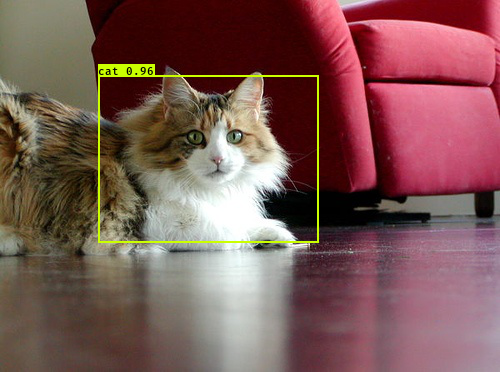

Input image filename:/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/006155.jpg
(416, 416, 3)
Found 11 boxes for img
car 0.41 (83, 165) (136, 185)
car 0.46 (43, 163) (82, 181)
car 0.55 (69, 166) (109, 184)
car 0.62 (118, 167) (156, 190)
car 0.64 (136, 171) (183, 189)
car 0.75 (170, 172) (226, 190)
car 0.82 (290, 174) (367, 205)
car 0.86 (19, 163) (64, 179)
car 0.86 (341, 173) (431, 214)
car 0.87 (234, 166) (318, 204)
car 0.91 (395, 175) (495, 218)
0.1613860150000619


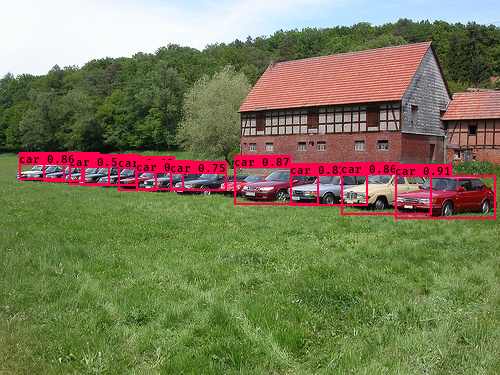

Input image filename:/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/006054.jpg
(416, 416, 3)
Found 0 boxes for img
0.15063749899991308


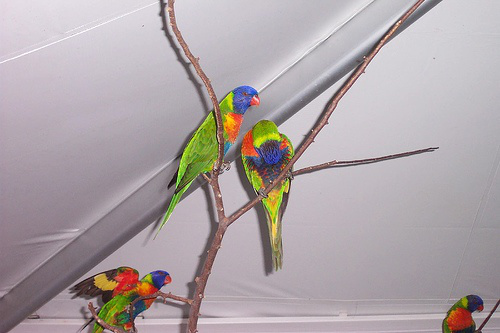

KeyboardInterrupt: ignored

In [0]:
#@title Output { vertical-output: true }
%cd "/content/CH678/keras-yolo3"
import sys
import argparse
import easydict

from IPython.display import display # to display images

sys.path.append('/content/CH678/keras-yolo3')

from yolo import YOLO, detect_video
from PIL import Image


def detect_img(yolo):
    while True:
        img = input('Input image filename:')
        
        if img =='end':
            break
            
        else:
            try:
                image = Image.open(img)
            except:
                print('Open Error! Try again!')
                continue
            else:
                r_image = yolo.detect_image(image)
                #r_image.show()
                display(r_image)
    
       # yolo.close_session()

FLAGS = None

args=easydict.EasyDict( {
            'model_path': '/content/CH678/keras-yolo3/logs/000/trained_weights_final.h5'
#            'model':    YOLO.get_defaults("model_path")
           ,'anchors': YOLO.get_defaults("anchors_path")
           ,'classes_path': '/content/CH678/keras-yolo3/model_data/voc_classes.txt'
#           ,'classes': YOLO.get_defaults("classes_path")
#           ,'gpu_num': str(YOLO.get_defaults("gpu_num"))
           ,'image' : 'a'
        })

if __name__ == '__main__':

    FLAGS = args
    print("Image detection mode")
    detect_img(YOLO(**vars(FLAGS)))

### (1) 좀 더 학습한 결과로 detection
- 위에서 10번 학습한 weight로 36번더 학습한 결과(학습장비 : GPU : TITAN Xp)
- 50번 학습예정이었으나 loss의 변동이 별로 없어 학습 종료
- 레이어는 freeze 하지 않음
- 하이퍼 파라메터는 batchsize 10-->16으로 변경

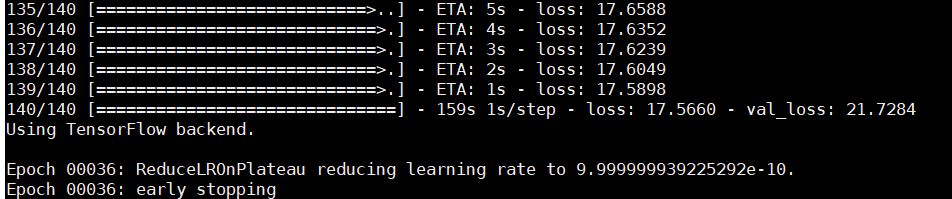

 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/000049.jpg
 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/001552.jpg
 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/006054.jpg
 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/007404.jpg
 *   /content/CH678/data/VOCdevkit/VOC2007/JPEGImages/009067.jpg


/content/gdrive/My Drive/04_영상인식_copied/CH678/keras-yolo3
Image detection mode
/content/CH678/keras-yolo3/model_data/trained_36_unfreeze.h5 model, anchors, and classes loaded.
Input image filename:/content/CH678/data/VOCdevkit/VOC2007/JPEGImages/006054.jpg
(416, 416, 3)
Found 2 boxes for img
bird 0.66 (75, 270) (186, 326)
bird 0.75 (130, 79) (295, 234)
4.8543775329999335


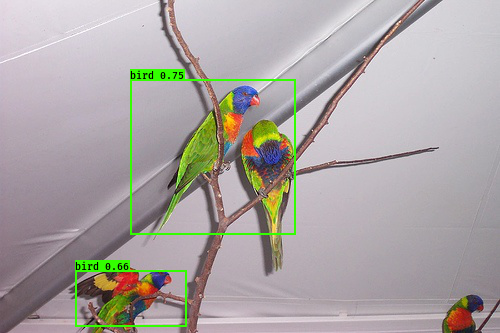

Input image filename:end


In [0]:
#@title Output { vertical-output: true }
%cd "/content/CH678/keras-yolo3"
import sys
import argparse
import easydict

from IPython.display import display # to display images

sys.path.append('/content/CH678/keras-yolo3')

from yolo import YOLO, detect_video
from PIL import Image


def detect_img(yolo):
    while True:
        img = input('Input image filename:')
        
        if img =='end':
            break
            
        else:
            try:
                image = Image.open(img)
            except:
                print('Open Error! Try again!')
                continue
            else:
                r_image = yolo.detect_image(image)
                #r_image.show()
                display(r_image)
    
       # yolo.close_session()

FLAGS = None

args=easydict.EasyDict( {
            'model_path': '/content/CH678/keras-yolo3/model_data/trained_36_unfreeze.h5'
#            'model':    YOLO.get_defaults("model_path")
           ,'anchors': YOLO.get_defaults("anchors_path")
           ,'classes_path': '/content/CH678/keras-yolo3/model_data/voc_classes.txt'
#           ,'classes': YOLO.get_defaults("classes_path")
#           ,'gpu_num': str(YOLO.get_defaults("gpu_num"))
           ,'image' : 'a'
        })

if __name__ == '__main__':

    FLAGS = args
    print("Image detection mode")
    detect_img(YOLO(**vars(FLAGS)))